**MNIST Handwritten Digit Classification using Deep Learning (Neural Network)**

Importing the dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 #For computer vision
from google.colab.patches import cv2_imshow #to observe the images
from PIL import Image #Image Processing
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Shape of the numpy array
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


This means that the images are in grayscale since there is no rgb

Training data =60,000 Images

Test data= 10,000 Images

Image Dimension --> 28 x 28

Grayscale --> 1 channel



In [ ]:
#Printing the 10th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(x_train[10].shape)

(28, 28)


3


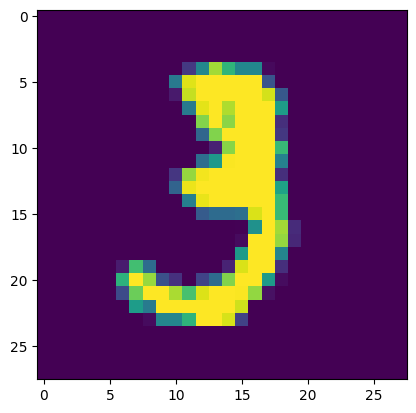

In [ ]:
# Displaying the image
plt.imshow(x_train[10])
plt.show

# print the corresponding label
print (y_train[10])

Image Labels

In [ ]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [ ]:
# Unique valuesin y_train
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**We can use these labels as such or we can also One Hot Ecoding

For the values since we have them from 0 to 9 then we create columns and binary encode them according if they are present or not**

In [ ]:
#Scaling the values (to get smaller values for the ones we have by sqeezing them)
x_train=x_train/255
x_test=x_test/255

In [ ]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building our Neural Network**

In [ ]:
# Setting up the layers of the Neural Network

model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)), #To Flatten the 2D array into 1D for processing
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid'),


])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compiling the Neural Network

model.compile(optimizer='adam', #To find the most optimal parameter
              loss='sparse_categorical_crossentropy',# We use Spare categorical crossentropy since we have one hot encoding
              metrics=['accuracy'])


In [ ]:
# training the Neural Network
model.fit(x_train,y_train,epochs=10)
#Epochs is how many times the neural network will go through the training data

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8464 - loss: 0.5319
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9553 - loss: 0.1495
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9677 - loss: 0.1062
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9755 - loss: 0.0824
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9801 - loss: 0.0655
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9831 - loss: 0.0550
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9858 - loss: 0.0461
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9880 - loss: 0.0393
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9890 - loss: 0.0346
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9908 - loss: 0.0284


**The Training Data Accuracy :99%**

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9671 - loss: 0.1239
0.97079998254776


**My Test Data Accuracy: 97%**

In [ ]:
print(x_test.shape)

(10000, 28, 28)


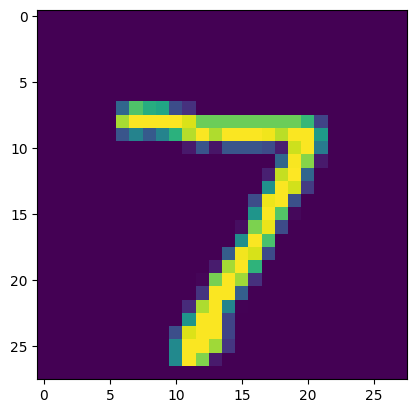

In [ ]:
# First data point in x_test
plt.imshow(x_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
print(y_pred.shape)

(10000, 10)


In [ ]:
print(y_pred[0])

[2.2816372e-03 3.9918534e-03 3.7305851e-02 9.2737740e-01 1.2530699e-09
 1.9445950e-02 4.2492170e-09 9.9999493e-01 8.7345444e-02 6.1921281e-01]


model.predict() gives the prediction probability for each class for that data point

In [ ]:
# Converting the prediction probabilities for each class label

label_for_first_test_image=np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
# Converting the prediction probabilities for each class label for all the test data
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(4), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

y_test --> True Labels


model.predict -->probability for each class


y_pred_labels -->takes the highest one probability and takes it's index number so we get predicted numbers not probabilities

**Confusion Matrix**

In [ ]:
conf_mat=confusion_matrix(y_test,y_pred_labels)

In [ ]:
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 949,    0,    1,    3,    1,    2,   15,    0,    1,    8],
       [   0, 1119,    1,    5,    0,    0,    3,    2,    5,    0],
       [   1,    1, 1005,    6,    2,    0,    3,    7,    7,    0],
       [   0,    0,    3,  997,    0,    3,    1,    3,    3,    0],
       [   0,    0,    4,    0,  969,    1,    7,    0,    1,    0],
       [   1,    0,    0,   19,    2,  857,    6,    2,    4,    1],
       [   3,    2,    2,    1,    2,    2,  946,    0,    0,    0],
       [   3,    2,   10,    3,    4,    0,    0,  993,    5,    8],
       [   1,    0,    6,    9,    3,    5,    6,    4,  937,    3],
       [   0,    2,    0,    8,   46,    8,    1,    4,    4,  936]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'Predicted Labels')

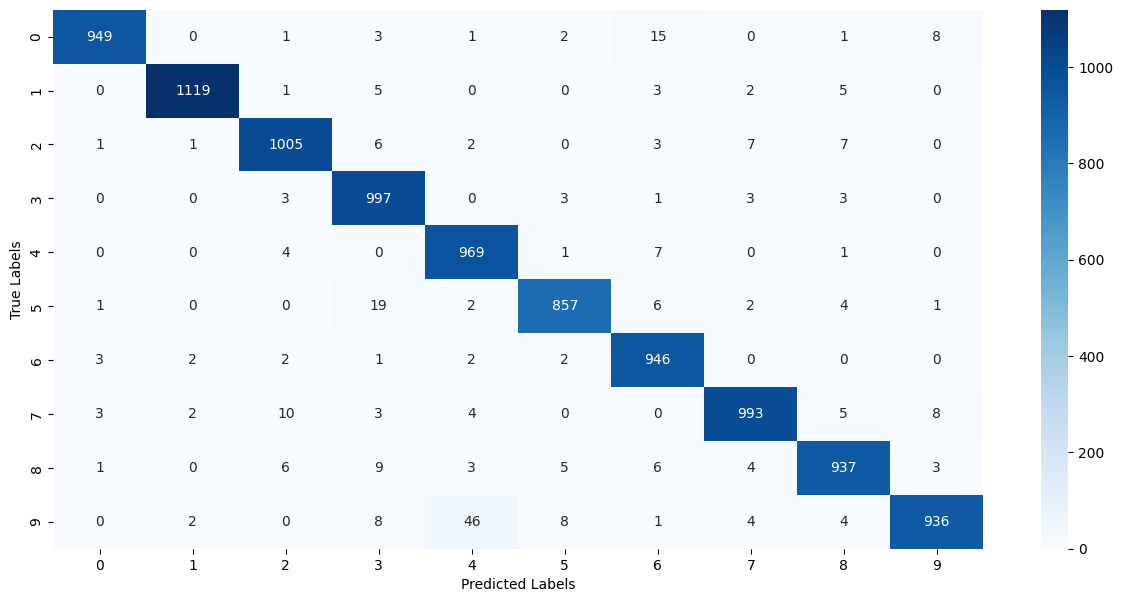

In [42]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Prediction System**

This is a system that is user-friendly that can predict what the handwritten digit is.

Add an image in the file and copy the path and  add it see if it predictes right.

**Preferably enter an image that is no greater than 64x64**

Enter the Path of the image to be predicted:/content/6-.png


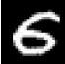

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
The Handwritten Digit is recognised as 6


In [40]:
input_image_path=input('Enter the Path of the image to be predicted:')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize=cv2.resize(grayscale,(28,28))

input_image_resize=input_image_resize/255

image_reshaped=np.reshape(input_image_resize,[1,28,28])

input_prediction=model.predict(image_reshaped)

input_pred_label=np.argmax(input_prediction)

print('The Handwritten Digit is recognised as',input_pred_label)
